# Multiple-objective portfolio optimization

# INTRODUCTION

Your task is to solve a multiple-objective portfolio optimization problem.
-  Use the basic Markowitz's model from 1952 (see Lecture 1)
-  Solve = construct Pareto front approximations.
-  The dataset is the same as for the portfolio game part 1 (bundle1.zip).
-  The dataset consists of the historical prices of 20 assets.
-  The bundle contains 20 files (*.txt) linked to different assets.
-  The name of the file suggests the asset's name.
-  The structure of every file is as follows:
1.  The first line contains the name of the asset.
2. The second line provides the number of data points N.
3. The following N lines are data points with the structure: time, price.
-  The historical timeline for all assets is time $\in$ [0,100].
-  Future predictions should be calculated for time = 200.

Goal: 
-  Load data, make predictions, and build the model. 
-  Illustrate your predictions (can be done in the jupyter notebook)
-  Then, implement the WSM and ECM methods (see the tutorial on quadratic programming provided below). 
-  Run your implementations for different calculation limits (e.g., the number of weight vectors for WSM). Compare the methods' efficiency in finding unique Pareto optimal solutions. Finally, illustrate generated Pareto fronts.

# Short tutorial on the cvxopt library for quadratic programming

In [ ]:
import numpy as np
from cvxopt import matrix, solvers

# QP Optimization Problem

### General model:

$max$ $\boldsymbol{cx} - \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{x} \geq \boldsymbol{0}$

### But the library uses the following form:

$min$ $\boldsymbol{cx} + \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ <br>

### Exmple

$min$ $2x^2_1+x_2^2+x_1x_2+x_1+x_2$ <br>
$s.t.$ <br>
$x_1 \geq 0$<br>
$x_2 \geq 0$<br>
$x_1 + x_2 = 1$<br>

### Hence:

In [ ]:
Q = matrix([ [4.0, 1.0], [1.0, 2.0] ]) ## [4, 1] is 1st column, not row!

In [ ]:
c = matrix([1.0, 1.0]) ### (1, 2) = dimensions (1 row and 2 columns)

In [ ]:
A = matrix([1.0, 1.0], (1,2)) ### (1, 2) = dimensions (1 row and 2 columns)

In [ ]:
b = matrix(1.0) 

In [ ]:
solQP=solvers.qp(Q, c, G, h, A, b)

In [ ]:
print(solQP.keys())

In [ ]:
print(solQP['x'])
print(solQP['primal objective'])

# We can also solve LP problems:

$min$ $\boldsymbol{c}\boldsymbol{x}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ (optional)

### Exmple

$min$ $2x_1+x_2$ <br>
$s.t.$ <br>
$-x_1 +x_2 \leq 1$ <br>
$x_1 + x_2 \geq 2$ <br>
$x_2 \geq 0$<br>
$x_1 - 2x_2 \leq 4$

In [ ]:
G = matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ])
h = matrix([ 1.0, -2.0, 0.0, 4.0 ])
c = matrix([ 2.0, 1.0 ])
solLP = solvers.lp(c,G,h)  
###!!!! OPTIONALLY A and b can be provided (equality constraints) as in solQP=solvers.qp(Q, c, G, h, A, b)

In [ ]:
print(solLP.keys())

In [ ]:
print(solLP['x'])
print(solLP['primal objective'])

# Portfolio optimization

In [ ]:
!mkdir -p data
!unzip Bundle1.zip -d data

In [10]:
import pandas as pd
import pathlib

NUM_ASSETS = 20

# Function to read asset data from a text file
def read_asset_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        asset_name = lines[0].strip()
        num_points = int(lines[1].strip())
        data = [float(line.split()[1]) for line in lines[2:num_points+2]]
    
    return asset_name, data

# Read all asset data
asset_data = {}
for file in pathlib.Path('data').glob('*.txt'):
    asset_name, data = read_asset_data(file)
    asset_data[asset_name] = data
asset_data = pd.DataFrame(asset_data)

assert len(asset_data.columns) == NUM_ASSETS

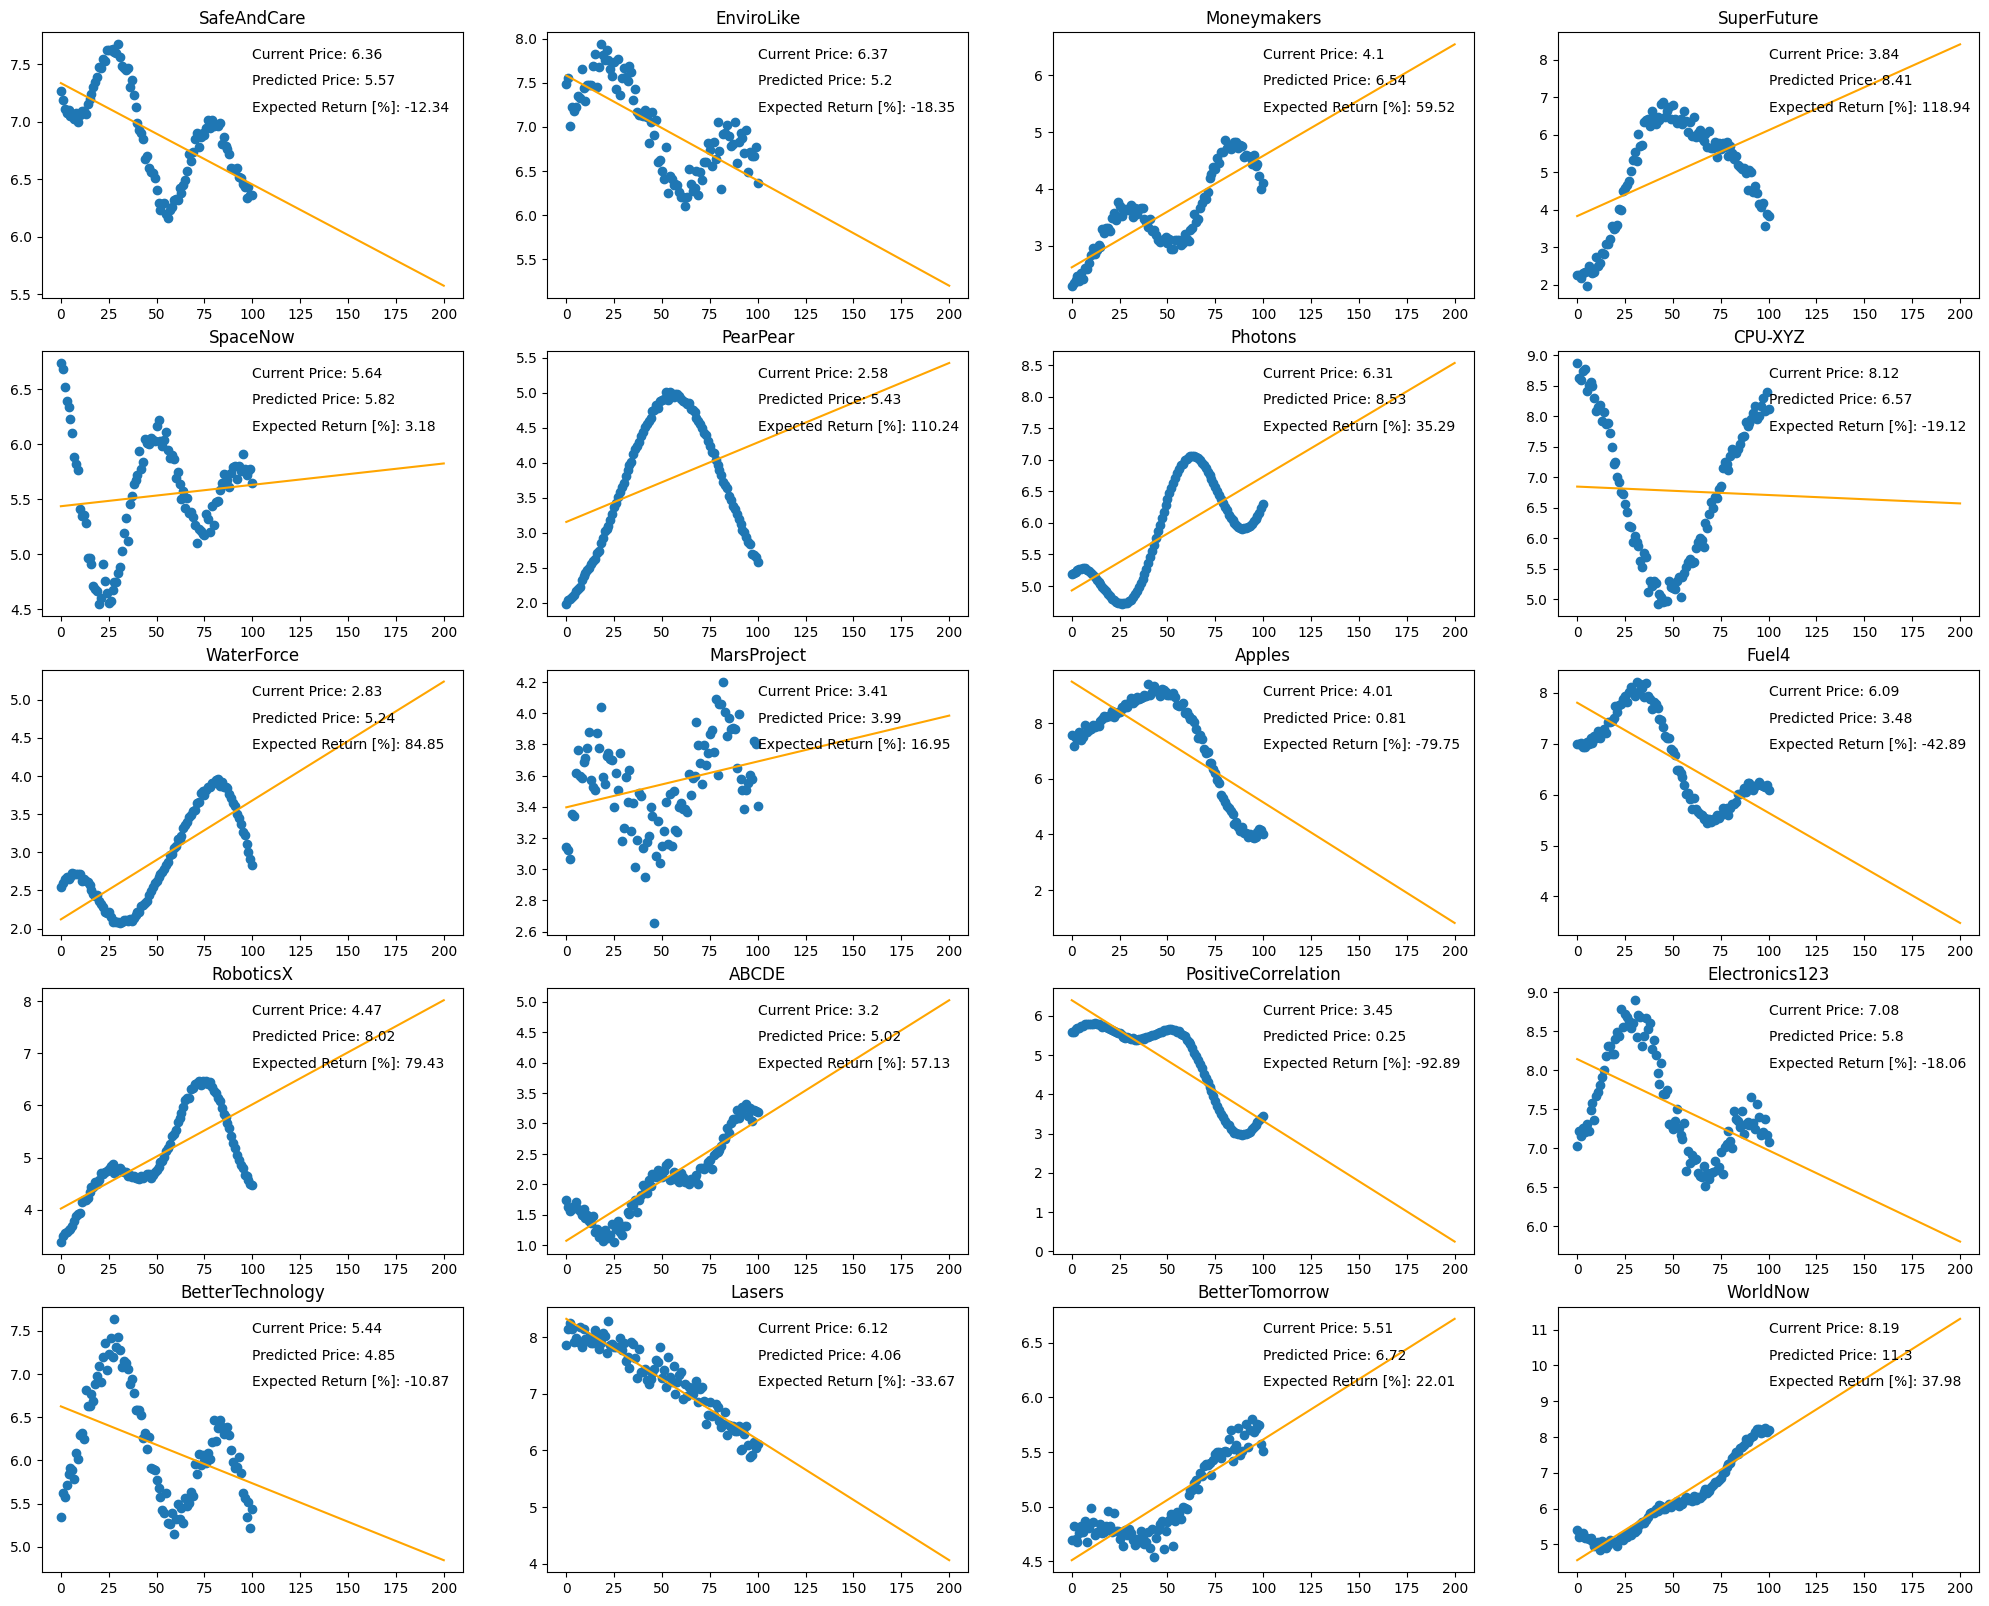

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(5, 4, figsize=(25, 20))

for i, asset in enumerate(asset_data.columns):
    ax = axs.flat[i]
    ax.set_title(asset)

    data = asset_data[asset].values

    model = LinearRegression()
    model.fit(np.arange(0, 101).reshape(-1, 1), data)
    
    predictions = model.predict(np.arange(0, 201).reshape(-1, 1))

    ax.scatter(np.arange(0, 101), asset_data[asset])
    ax.plot(np.arange(0, 201), predictions, color='orange')

    cur = data[100]
    pred = predictions[200]
    ret = (pred - cur) / cur * 100

    ax.text(0.5, 0.9, f'Current Price: {np.round(cur, 2)}', transform=ax.transAxes)
    ax.text(0.5, 0.8, f'Predicted Price: {np.round(pred, 2)}', transform=ax.transAxes)
    ax.text(0.5, 0.7, f'Expected Return [%]: {np.round(ret, 2)}', transform=ax.transAxes)

In [11]:
asset_data.cov()

,SafeAndCare,EnviroLike,Moneymakers,SuperFuture,SpaceNow,PearPear,Photons,CPU-XYZ,WaterForce,MarsProject,Apples,Fuel4,RoboticsX,ABCDE,PositiveCorrelation,Electronics123,BetterTechnology,Lasers,BetterTomorrow,WorldNow
SafeAndCare,0.175232,0.177487,-0.026899,-0.216068,-0.129568,-0.168245,-0.275011,0.079495,-0.125186,0.016614,0.202389,0.254854,-0.102710,-0.183971,0.133145,0.203498,0.229615,0.157525,-0.069161,-0.254120
EnviroLike,0.177487,0.250389,-0.091479,-0.380612,-0.110005,-0.279232,-0.362200,0.160250,-0.187747,0.004141,0.240262,0.348483,-0.246570,-0.206808,0.203761,0.265738,0.245174,0.200404,-0.093914,-0.317261
Moneymakers,-0.026899,-0.091479,0.491175,0.285860,-0.097308,0.063314,0.133711,0.115281,0.281533,0.110500,-0.943218,-0.270020,0.392753,0.302164,-0.660395,-0.066457,0.042990,-0.370008,0.210711,0.578405
SuperFuture,-0.216068,-0.380612,0.285860,2.033382,0.026755,1.270300,0.572076,-1.488363,0.095395,-0.104510,0.582793,-0.231142,0.697089,0.239188,-0.145229,-0.106638,-0.073457,-0.298477,0.035503,0.432536
SpaceNow,-0.129568,-0.110005,-0.097308,0.026755,0.248204,0.024280,0.143621,0.021136,0.045852,-0.059082,-0.087916,-0.117455,-0.101497,0.133655,-0.021188,-0.163424,-0.221355,-0.056184,0.009206,0.128429
PearPear,-0.168245,-0.279232,0.063314,1.270300,0.024280,0.884963,0.452553,-1.013762,0.062465,-0.077151,0.619908,-0.212978,0.465661,0.082508,0.069168,-0.145679,-0.119229,-0.114002,-0.011171,0.140304
Photons,-0.275011,-0.362200,0.133711,0.572076,0.143621,0.452553,0.596361,-0.237018,0.324996,0.009698,-0.348133,-0.594502,0.438083,0.298947,-0.300121,-0.440417,-0.390584,-0.299102,0.152333,0.457647
CPU-XYZ,0.079495,0.160250,0.115281,-1.488363,0.021136,-1.013762,-0.237018,1.446062,0.237909,0.169367,-1.393334,-0.186209,-0.258346,0.127324,-0.465960,-0.123045,-0.066274,-0.097038,0.170741,0.196694
WaterForce,-0.125186,-0.187747,0.281533,0.095395,0.045852,0.062465,0.324996,0.237909,0.372828,0.097169,-0.823955,-0.488608,0.373169,0.283588,-0.508762,-0.308465,-0.193035,-0.298974,0.195250,0.469625
MarsProject,0.016614,0.004141,0.110500,-0.104510,-0.059082,-0.077151,0.009698,0.169367,0.097169,0.084655,-0.285765,-0.091815,0.099289,0.037984,-0.156168,-0.029384,0.019304,-0.062089,0.056968,0.088760


# Model
### Constraints
$w_i >= 0 \text{ for i = 1, ..., n}$

In [ ]:
from cvxopt import matrix, solvers

G = matrix(-np.identity(NUM_ASSETS))
h = matrix(np.zeros(NUM_ASSETS))

$w_1 + w_2 + ... + w_n = 1$

In [67]:
A = matrix(np.ones(NUM_ASSETS), (1, NUM_ASSETS))
b = matrix(1.0)

We don't need to check if weights are less then 1, because two above constraints are enough to ensure that.

# Weighted sum method
## Normalization
### 1. Find extreme solutions by minimizing objectives individually

In [ ]:
Q = matrix(2 * asset_data.cov().values)

In [ ]:
W1 = np.linspace(0, 1, 10)### Objectives
W2 = 1 - W1

for w1, w2 in zip(W1, W2):
    Q = matrix(w1 * asset_data.cov().values)
    c = matrix(w2 * np.ones(NUM_ASSETS))

    sol = solvers.qp(Q, c, G, h, A, b)
    
    print(sol['x'])

# Epsilon-constrained method